In [117]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Paths to data folders for different classes
folder_paths = [
    'C:/Users/halhajali/OneDrive - Fondazione Istituto Italiano Tecnologia/Desktop/IIT-UNIBZ/Dataset/Iron-Stress/Late/',
     'C:/Users/halhajali/OneDrive - Fondazione Istituto Italiano Tecnologia/Desktop/IIT-UNIBZ/Dataset/Iron-Stress/Early/',
     'C:/Users/halhajali/OneDrive - Fondazione Istituto Italiano Tecnologia/Desktop/IIT-UNIBZ/Dataset/Iron-Stress/Control/',
]

random.seed(42)
np.random.seed(42)



plants = ['plant0', 'plant1', 'plant2', 'plant3']

# Load data from all folders
def load_plant_data():
    all_data = []
    labels = []
    
    for label, folder_path in enumerate(folder_paths):
        for plant in plants:
            plant_folder = os.path.join(folder_path, plant)
            for filename in os.listdir(plant_folder):
                if filename.endswith('.csv'):
                    file_path = os.path.join(plant_folder, filename)
                    sample = pd.read_csv(file_path, header=None)
                    data = np.array(sample)[:, [3,4]].flatten()
                    all_data.append(data) 
                    labels.append(label)    
    
    return np.array(all_data), np.array(labels)


# Load data
X, y = load_plant_data()
print("data", X.shape)
print("labels", y.shape)
print("")

data (2628, 400)
labels (2628,)



In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set", X_train.shape)
print("Training labels", y_train.shape)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42, stratify=y_test)

print("Testing set", X_test.shape)
print("Testing labels", y_test.shape)

print("val set", X_val.shape)
print("val labels", y_val.shape)


def get_class_distribution(y):
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))

train_distribution = get_class_distribution(y_train)
val_distribution = get_class_distribution(y_val)
test_distribution = get_class_distribution(y_test)
print(train_distribution)
print(val_distribution)
print(test_distribution)


X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

Training set (1839, 400)
Training labels (1839,)
Testing set (394, 400)
Testing labels (394,)
val set (395, 400)
val labels (395,)
{0: 627, 1: 627, 2: 585}
{0: 135, 1: 135, 2: 125}
{0: 134, 1: 134, 2: 126}


In [119]:
best_val_accuracy = float("-inf")
best_model = None
worst_val_accuracy = float("inf")
worst_model = None
worst_l1 = None
best_l1 = None
best_c  = None
worst_c = None
for l1_ratio in [0.1, 0.3, 0.5, 1, 0.7]:  
    for C in [0.1, 1,5,20,40, 10,50, 100]:  # Different values of the regularization parameter C
        model = LogisticRegression(
            multi_class='multinomial', 
            penalty='elasticnet', 
            solver='saga', 
            l1_ratio=l1_ratio, 
            C=C, 
            max_iter=1000
        )
        model.fit(X_train_scaled, y_train)

        # Validate the model
        y_pred_val = model.predict(X_val_scaled)
        val_accuracy = accuracy_score(y_val, y_pred_val)

        print(f"Validation Accuracy (l1_ratio={l1_ratio}, C={C}): {val_accuracy:.4f}")

        # Keep the best model based on validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_l1 = l1_ratio
            best_c = C
        if val_accuracy < worst_val_accuracy:
            worst_val_accuracy = val_accuracy
            worst_model = model
            worst_l1 = l1_ratio
            worst_c = C


print("\n=== Evaluating Best model ===")
y_pred_test = best_model.predict(X_test_scaled)
print("\nBest Validation Accuracy:", best_val_accuracy)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred_test))

print("Best l1_ratio:", best_l1)
print("Best C:", best_c)

print("\n=== Evaluating worst model ===")

y_pred_test_worst = worst_model.predict(X_test_scaled)
print("\nWorst Validation Accuracy:", worst_val_accuracy)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_worst))
print("Worst l1_ratio:", worst_l1)
print("Worst C:", worst_c)



Validation Accuracy (l1_ratio=0.1, C=0.1): 0.8152


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.1, C=1): 0.9266
Validation Accuracy (l1_ratio=0.1, C=5): 0.9367


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.1, C=20): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.1, C=40): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.1, C=10): 0.9392


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.1, C=50): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.1, C=100): 0.9443
Validation Accuracy (l1_ratio=0.3, C=0.1): 0.7823


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.3, C=1): 0.9241
Validation Accuracy (l1_ratio=0.3, C=5): 0.9367


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.3, C=20): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.3, C=40): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.3, C=10): 0.9418


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.3, C=50): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.3, C=100): 0.9443
Validation Accuracy (l1_ratio=0.5, C=0.1): 0.7519


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.5, C=1): 0.9215


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.5, C=5): 0.9367


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.5, C=20): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.5, C=40): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.5, C=10): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.5, C=50): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.5, C=100): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=0.1): 0.7544


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=1): 0.9165


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=5): 0.9392


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=20): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=40): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=10): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=50): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=1, C=100): 0.9443
Validation Accuracy (l1_ratio=0.7, C=0.1): 0.7418


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.7, C=1): 0.9165


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.7, C=5): 0.9367


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.7, C=20): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.7, C=40): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.7, C=10): 0.9443


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (l1_ratio=0.7, C=50): 0.9443
Validation Accuracy (l1_ratio=0.7, C=100): 0.9443

=== Evaluating Best model ===

Best Validation Accuracy: 0.9443037974683545
Test Accuracy: 0.9213197969543148

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       134
           1       0.90      0.87      0.89       134
           2       0.96      0.99      0.98       126

    accuracy                           0.92       394
   macro avg       0.92      0.92      0.92       394
weighted avg       0.92      0.92      0.92       394

Best l1_ratio: 0.1
Best C: 20

=== Evaluating worst model ===

Worst Validation Accuracy: 0.7417721518987341
Test Accuracy: 0.6548223350253807
Worst l1_ratio: 0.7
Worst C: 0.1


c:\Users\halhajali\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Macro-Averaged F1 Score: 0.9219704036635007
Weighted F1 Score: 0.9208619347023534
recall 0.9227276316828555


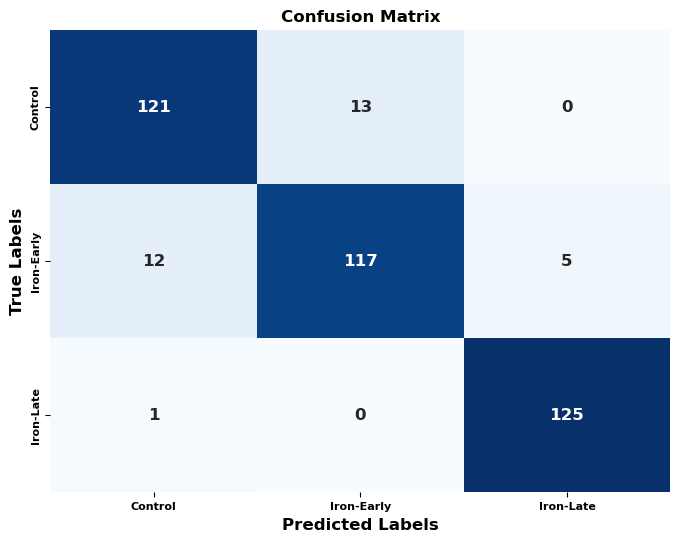

In [123]:
from sklearn.metrics import f1_score, recall_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

f1_macro = f1_score(y_test, y_pred_test, average='macro')  # Macro-averaged F1-score
print("Macro-Averaged F1 Score:", f1_macro)

f1_weighted = f1_score(y_test, y_pred_test, average='weighted')  # Weighted F1-score
print("Weighted F1 Score:", f1_weighted)

recall = recall_score (y_test,y_pred_test, average='macro')
print ("recall", recall)


cm = confusion_matrix(y_test, y_pred_test)

xticklabels=['Control','Iron-Early', 'Iron-Late']
yticklabels=['Control','Iron-Early', 'Iron-Late']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xticklabels, yticklabels=yticklabels, cbar = False)
plt.xlabel('Predicted Labels', fontsize=12, fontweight='bold')
plt.ylabel('True Labels', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
for text in plt.gca().texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.show()

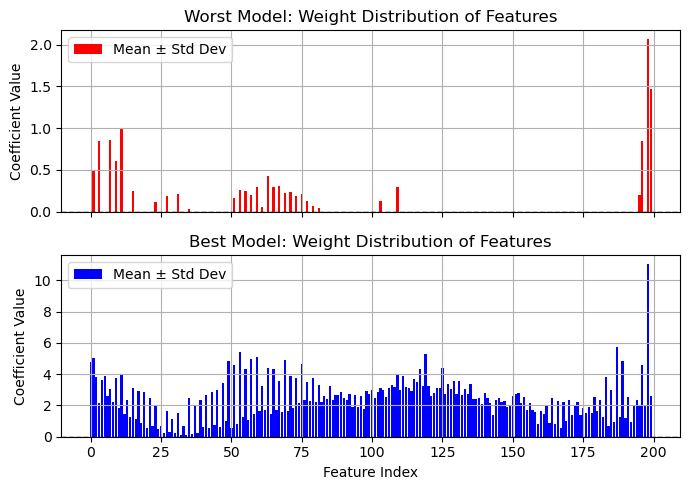

In [ ]:
import matplotlib.pyplot as plt
coefficients_worst = worst_model.coef_[0]
coefficients_best = best_model.coef_[0]

reshaped_coefficients_worst = np.column_stack((coefficients_worst[:200], coefficients_worst[200:]))
reshaped_coefficients_best = np.column_stack((coefficients_best[:200], coefficients_best[200:]))

means_worst = np.sum(np.abs(reshaped_coefficients_worst), axis=1)
means_best = np.sum(np.abs(reshaped_coefficients_best), axis=1)
#means_best = np.sum(reshaped_coefficients_best, axis=1)

features_worst = np.abs(coefficients_worst) 
features_best  = np.abs(coefficients_best)


fig, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
#fig, ax = plt.subplots(figsize=(7, 5))
axes[0].bar(range(200), means_worst, color='r', capsize=4, label="Mean ± Std Dev")
axes[0].set_ylabel('Coefficient Value')
axes[0].set_title('Worst Model: Weight Distribution of Features')
axes[0].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0].legend()
axes[0].grid(True)

# Plot best model coefficients
axes[1].bar(range(200), means_best, color='b', capsize=2, label="Mean ± Std Dev")
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Coefficient Value')
axes[1].set_title('Best Model: Weight Distribution of Features')
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1].legend()
axes[1].grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [125]:
reshaped_coefficients_best = np.column_stack((coefficients_best[:200], coefficients_best[200:]))
means_best = np.mean(np.abs(reshaped_coefficients_best), axis=1)
top_20_indices = np.argsort(means_best, axis=None)[::-1][:4]
print(top_20_indices)


top_20_indices = np.argsort(means_worst , axis=None)[::-1][:4]
print(top_20_indices)



[198 187  53 119]
[198 199  11   7]
